In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

In [2]:
stocks = ['GE', 'AAPL', 'MSFT', 'IKNA']
start = date(2023, 1, 1)
print(type(start))

<class 'datetime.date'>


In [3]:
stock_price = yf.download(stocks, start)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [4]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 2023-01-03 to 2023-06-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    111 non-null    float64
 1   GE      111 non-null    float64
 2   IKNA    111 non-null    float64
 3   MSFT    111 non-null    float64
dtypes: float64(4)
memory usage: 4.3 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

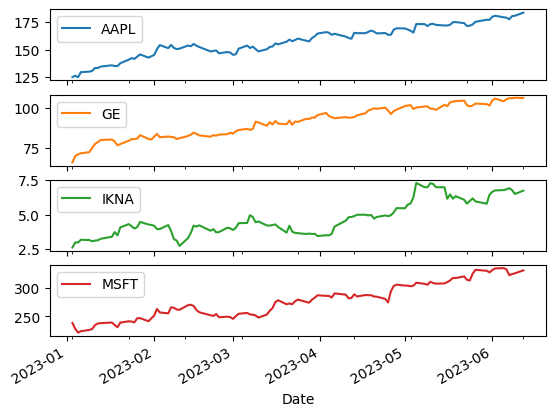

In [5]:
stock_price.plot(subplots=True)

In [6]:
# Get returns
# returns = stock_px / stock_px.shift() - 1
# or
returns = stock_price.pct_change()
returns

,AAPL,GE,IKNA,MSFT
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.010314,0.058204,0.141221,-0.043743
2023-01-05,-0.010605,0.015527,-0.003344,-0.029638
2023-01-06,0.036794,0.009118,0.067114,0.011785
2023-01-09,0.004089,0.010147,-0.006289,0.009736
...,...,...,...,...
2023-06-06,-0.002060,0.013064,0.008837,-0.006727
2023-06-07,-0.007756,0.005879,0.011679,-0.030868
2023-06-08,0.015465,-0.000094,-0.020202,0.005814


In [7]:
# Portfolio weights
weights = np.array([0.25, 0.25, 0.25, 0.25])
# or (for equally weighted portfolio)
# numstocks = 4
# weights = np.repeat(1/numstocks, numstocks)

In [8]:
# Covariance matrix
cov_matrix = (returns.cov())
cov_matrix

,AAPL,GE,IKNA,MSFT
AAPL,0.000181,0.000069,0.000211,0.000139
GE,0.000069,0.000259,0.000229,0.000042
IKNA,0.000211,0.000229,0.004105,0.000097
MSFT,0.000139,0.000042,0.000097,0.000333


In [9]:
# Formula to determine portfolio variance (linear algebra)
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
port_variance

0.00040316358731677654

In [10]:
# Average daily returns
ret_mean = returns.mean()
ret_mean

AAPL    0.003621
GE      0.004425
IKNA    0.010627
MSFT    0.003172
dtype: float64

In [11]:
# Average daily return of portfolio
ret_port = np.sum(ret_mean*weights)
ret_port

0.005461258017188244

In [12]:
# .dot returns the sum product ==> daily returns of portfolio
returns['Portfolio'] = returns.dot(weights)

In [13]:
returns

,AAPL,GE,IKNA,MSFT,Portfolio
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010314,0.058204,0.141221,-0.043743,0.041499
2023-01-05,-0.010605,0.015527,-0.003344,-0.029638,-0.007015
2023-01-06,0.036794,0.009118,0.067114,0.011785,0.031203
2023-01-09,0.004089,0.010147,-0.006289,0.009736,0.004421
...,...,...,...,...,...
2023-06-06,-0.002060,0.013064,0.008837,-0.006727,0.003278
2023-06-07,-0.007756,0.005879,0.011679,-0.030868,-0.005267
2023-06-08,0.015465,-0.000094,-0.020202,0.005814,0.000246


In [14]:
# Plot cumulative returns
# daily_cum_ret = (1+returns).cumprod()
# daily_cum_ret.plot()
# or
# np.cumprod(1 + returns).plot()

<Axes: xlabel='Date'>

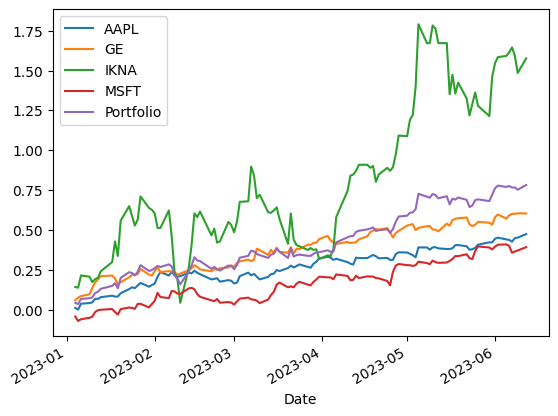

In [15]:
# Plot cumulative returns
cum_returns = np.cumprod(1 + returns)-1
cum_returns.plot()

In [24]:
print(cum_returns.iloc[-1])

AAPL         0.473776
GE           0.602810
IKNA         1.576336
MSFT         0.391637
Portfolio    0.781505
Name: 2023-06-12 00:00:00, dtype: float64


In [16]:
# Portfolio variance (simple)
port_var2 = returns['Portfolio'].var()
port_var2

0.0004031635873167765

<Axes: ylabel='Frequency'>

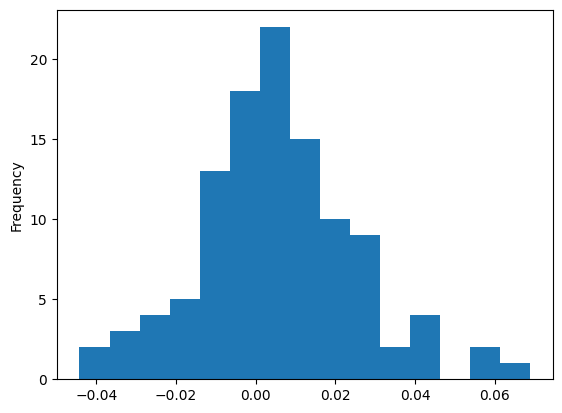

In [17]:
returns['Portfolio'].plot(kind='hist', bins=15)

In [18]:
print('Mean: \n' + str(returns.mean()))
print('Vol: \n' + str(returns.std()))
print('Skew: \n' + str(returns.skew()))
print('Kurtosis: \n' + str(returns.kurtosis()))

Mean: 
AAPL         0.003621
GE           0.004425
IKNA         0.010627
MSFT         0.003172
Portfolio    0.005461
dtype: float64
Vol: 
AAPL         0.013444
GE           0.016097
IKNA         0.064068
MSFT         0.018240
Portfolio    0.020079
dtype: float64
Skew: 
AAPL         0.554787
GE           0.295778
IKNA         0.463004
MSFT         0.569841
Portfolio    0.369513
dtype: float64
Kurtosis: 
AAPL         0.529558
GE           0.857506
IKNA         0.843369
MSFT         1.326396
Portfolio    0.875752
dtype: float64


In [19]:
sharpe = (returns.mean() / returns.std()) * np.sqrt(252)
sharpe

AAPL         4.275261
GE           4.364214
IKNA         2.633027
MSFT         2.760750
Portfolio    4.317699
dtype: float64

In [20]:
# Calculate using log returns (?)
log_return = np.sum(np.log(stock_price/stock_price.shift())*weights, axis=1)
log_return

Date
2023-01-03    0.000000
2023-01-04    0.038551
2023-01-05   -0.007172
2023-01-06    0.030471
2023-01-09    0.004389
                ...   
2023-06-06    0.003241
2023-06-07   -0.005417
2023-06-08    0.000160
2023-06-09   -0.008274
2023-06-12    0.016607
Length: 111, dtype: float64

In [21]:
print(log_return.mean())
print(log_return.std())

0.0048117917727564215
0.019682309100729305


<Axes: ylabel='Frequency'>

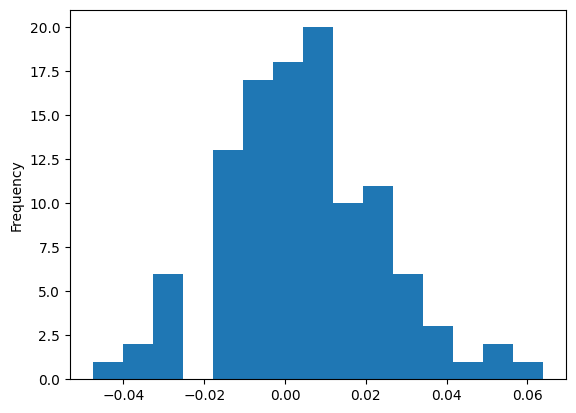

In [22]:
log_return.plot(kind='hist', bins= 15)

In [23]:
sharpe_ratio = (log_return.mean()/log_return.std())*np.sqrt(252)
sharpe_ratio

3.8808874485773788